In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 2 Dataset

We are going to use the MNIST dataset, which consists of images of written digits together
with their label. As it is a very common dataset, it can be downloaded directly with a
function of the Keras library.

5


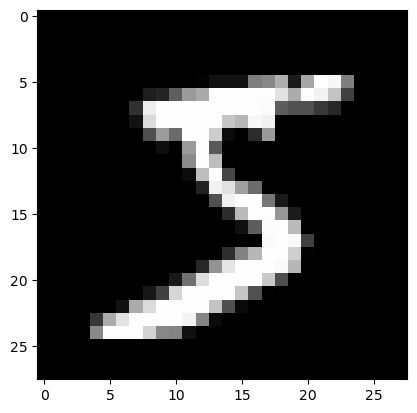

In [2]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

In [3]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        val -= np.log(pred[i, true[i]])
#    return val / len(true)
model.summary()


Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# untrained model
logits = model(x_train)
np.argmax(logits, 1)[0:100]

array([5, 5, 5, 8, 3, 5, 5, 3, 0, 3, 5, 8, 5, 5, 6, 6, 5, 5, 0, 5, 3, 5,
       7, 8, 5, 5, 3, 5, 3, 1, 5, 5, 7, 5, 7, 3, 5, 5, 5, 7, 5, 5, 5, 5,
       4, 5, 3, 3, 5, 5, 5, 5, 5, 0, 5, 3, 5, 5, 3, 8, 0, 3, 7, 5, 3, 8,
       7, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 5, 3, 5, 5,
       8, 3, 5, 5, 5, 5, 1, 5, 5, 1, 5, 3], dtype=int64)

In [5]:
# what we would like to get
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

# 4 Model

The file ``TP_MNIST_basic_functions.ipynb`` or ``TP_MNIST_basic_functions.py`` contains a
neural network model written with Keras for the question of hand-written digit recognition.

The loss function is the categorical cross-entropy function whose formula is:

$$
\ell(\mathbf{y}^\text{pred}, \mathbf{y}^\text{true}) = - \sum_{i=1}^{n} \sum_{d=0}^{9} y^\text{true}_{i,d} \log(y^\text{pred}_{i,d})
$$

where $ y^\text{true}_{i,d} = 1 $ if image $ i $ represents digit $ d $ and $ y^\text{true}_{i,d} = 0 $ otherwise.


## Question 4.1
How many optimization variables are we going to train using this model?

Given the information from the model summary, we can determine the number of optimization variables. In a neural network, the optimization variables are the parameters of the model that the training process will adjust to minimize the loss function. These parameters typically include the weights and biases of each layer.

From the model summary, the parameters for each layer are listed under "Param #":

- `dense_1 (Dense)` layer has 25,120 parameters.
- `dense_2 (Dense)` layer has 1,056 parameters.
- `predictions (Dense)` layer has 330 parameters.

Adding these up, we get the total number of parameters that will be optimized during training:

Total parameters = 25,120 + 1,056 + 330 = 26,506

# 5 Stochastic gradient descent

## Question 5.1
Reusing the code provided in the basic functions file, implement stochastic gradient descent
for the resolution of the neural network model.

In [ ]:
# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)

# Define the number of epochs and the batch size for SGD
epochs = 10
batch_size = 8
learning_rate = 0.01

# Define the loss function
loss = tf.keras.losses.CategoricalCrossentropy()

# Function to update weights with the gradient
def update_weights(model, gradients, learning_rate):
    new_weights = [w - learning_rate * grad for w, grad in zip(model.trainable_weights, gradients)]
    model.set_weights(new_weights)

# Training loop
for epoch in range(epochs):
    print(f'Epoch {epoch+1}/{epochs}')
    # Shuffle the dataset
    indices = np.arange(len(x_train))
    np.random.shuffle(indices)
    x_train_shuffled = x_train[indices]
    y_train_shuffled = y_train_one_hot[indices]
    
    # Iterate over the batches of the dataset
    for start_idx in range(0, len(x_train), batch_size):
        end_idx = start_idx + batch_size
        x_train_batch = x_train_shuffled[start_idx:end_idx]
        y_train_batch = y_train_shuffled[start_idx:end_idx]
        
        # Compute the gradients
        with tf.GradientTape() as tape:
            logits = model(x_train_batch)  # Logits for this minibatch
            loss_value = loss(y_train_batch, logits)
        
        gradients = tape.gradient(loss_value, model.trainable_weights)
        
        # Update weights
        update_weights(model, gradients, learning_rate)
    
    # Evaluate the model's performance at the end of each epoch
    logits = model(x_train)
    loss_value = loss(y_train_one_hot, logits)
    print(f'Loss: {loss_value.numpy()}')


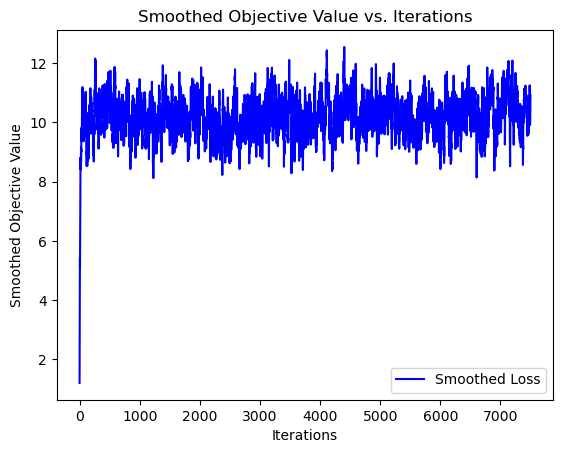

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)

# Define the batch size and learning rate
batch_size = 8
learning_rate = 0.001  # Smaller learning rate

# Define the loss function
loss = tf.keras.losses.CategoricalCrossentropy()

# Function to update weights with the gradient
def update_weights(model, gradients, learning_rate):
    new_weights = [w - learning_rate * grad for w, grad in zip(model.trainable_weights, gradients)]
    model.set_weights(new_weights)

# Initialize lists to keep track of loss
loss_values = []
smoothed_loss_values = []
smoothing_factor = 0.9  # Determines the degree of smoothing
smoothed_loss = 0

# Shuffle the dataset
indices = np.arange(len(x_train))
np.random.shuffle(indices)
x_train_shuffled = x_train[indices]
y_train_shuffled = y_train_one_hot[indices]

# Training loop for one epoch
for start_idx in range(0, len(x_train), batch_size):
    end_idx = start_idx + batch_size
    x_train_batch = x_train_shuffled[start_idx:end_idx]
    y_train_batch = y_train_shuffled[start_idx:end_idx]
    
    # Compute the gradients
    with tf.GradientTape() as tape:
        logits = model(x_train_batch)  # Logits for this minibatch
        loss_value = loss(y_train_batch, logits)
    
    gradients = tape.gradient(loss_value, model.trainable_weights)
    
    # Update weights
    update_weights(model, gradients, learning_rate)
    
    # Record the loss value for plotting
    current_loss = loss_value.numpy()
    loss_values.append(current_loss)
    
    # Update the smoothed loss
    smoothed_loss = (smoothing_factor * smoothed_loss) + ((1 - smoothing_factor) * current_loss)
    smoothed_loss_values.append(smoothed_loss)

# Plot the smoothed loss values
plt.plot(smoothed_loss_values, '-b', label='Smoothed Loss')
plt.xlabel('Iterations')
plt.ylabel('Smoothed Objective Value')
plt.title('Smoothed Objective Value vs. Iterations')
plt.legend()
plt.show()
